# Import Library

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Import Data

In [6]:
df_customer = pd.read_csv('Customer1.csv', sep=';')
df_product = pd.read_csv('Product.csv', sep=';')
df_store = pd.read_csv('Store.csv', sep=';')
df_transaction = pd.read_csv('Transaction.csv', sep=';')

# Data Cleansing & Preparation

In [7]:
# Mengecek nilai-nilai yang hilang
missing_values1 = df_customer.isnull().sum()
missing_values2 = df_product.isnull().sum()
missing_values3 = df_store.isnull().sum()
missing_values4 = df_transaction.isnull().sum()

# Mengecek duplikat
duplicate_rows1 = df_customer.duplicated().sum()
duplicate_rows2 = df_product.duplicated().sum()
duplicate_rows3 = df_store.duplicated().sum()
duplicate_rows4 = df_transaction.duplicated().sum()

In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [9]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [11]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


# Menggabungkan Data

In [21]:
merged_data1 = pd.merge(df_customer, df_transaction, on= 'CustomerID') 
merged_data2 = pd.merge(merged_data1, df_store, on='StoreID') 
merged = pd.merge(merged_data2, df_product, on= 'ProductID') 
merged.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Price_y
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",Oat,16000


# Membuat Model Regresi (Time Series)

In [28]:
# Mengubah tipe data kolom 'Date' ke format datetime
merged['Date'] = pd.to_datetime(merged['Date'], format='%d/%m/%Y')

# Mengubah tipe data kolom 'Longitude' dan 'Latitude' ke float
merged['Longitude'] = merged['Longitude'].apply(lambda x: float(str(x).replace(',', '.')))
merged['Latitude'] = merged['Latitude'].apply(lambda x: float(str(x).replace(',', '.')))

# Membuat data time series harian dengan jumlah 'Qty'
daily_data = merged.groupby('Date')['Qty'].sum().reset_index()

# Persiapan data time series
data = daily_data.set_index('Date')
data2 = data.resample('D').sum() 

data2.head()


,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30


<Axes: xlabel='Date'>

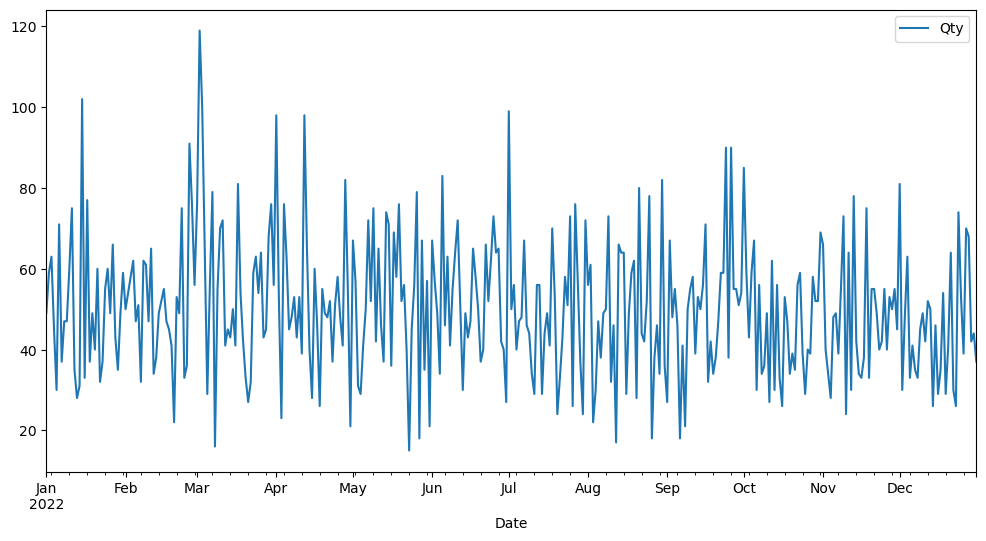

In [29]:
# Visualize Data
data2.plot(figsize=(12,6))

In [30]:
# Memisahkan Data
train_size = int(len(data2) * 0.8)
train_data, test_data = data2[:train_size], data2[train_size:]
print(train_data.shape, test_data.shape)

(292, 1) (73, 1)


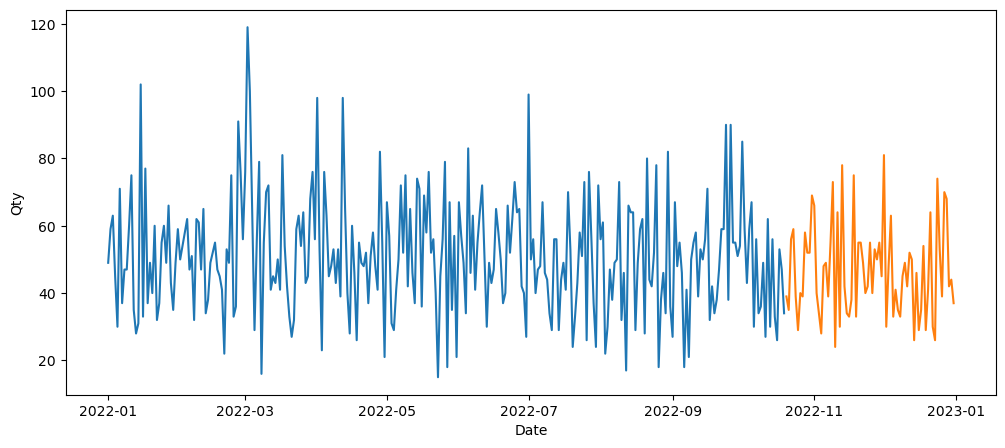

In [31]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Misalkan Anda sudah memiliki data time series pelatihan dalam 'train_data'

# Langkah 1: Tentukan nilai p, d, dan q
p = 2  # Order of Autoregression
d = 2  # Degree of Differencing
q = 2  # Order of Moving Average

# Langkah 2: Buat model ARIMA dengan parameter yang telah ditentukan
model = ARIMA(train_data, order=(p, d, q))

# Langkah 3: Latih model menggunakan data pelatihan
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [33]:
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Evaluasi performa
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 286.7117090837393


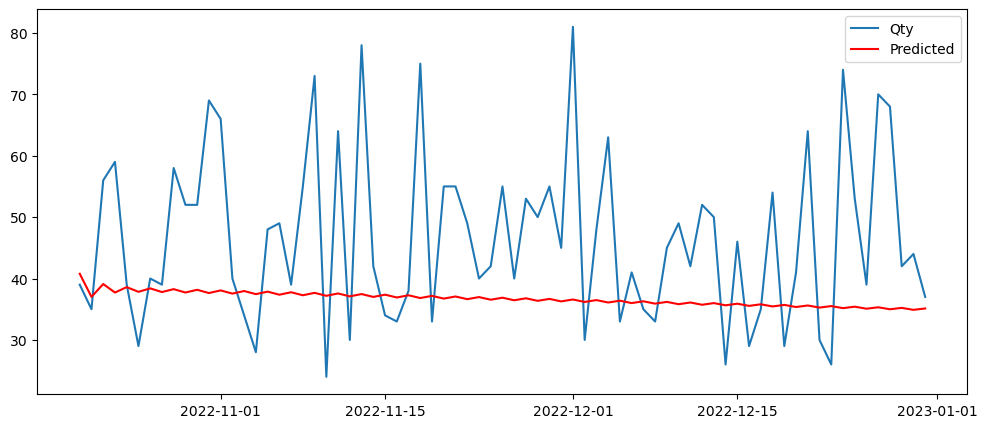

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

# Machine Learning Clustering

In [35]:
# Menggabungkan data berdasarkan customerID dan menghitung metrik-metrik tertentu
aggregated = merged.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

aggregated

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [36]:
# Persiapan Data untuk Clustering
X = aggregated[['TransactionID', 'Qty', 'TotalAmount']]

In [40]:
# Persiapan Data untuk Clustering
X = aggregated[['TransactionID', 'Qty', 'TotalAmount']]  # Define the features for clustering

# Define the number of clusters
n_clusters = 5  # Adjust the number of clusters as needed

# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan klastering pada data
# Fit the KMeans model and assign clusters to each data point
X['cluster'] = kmeans.fit_predict(X)





C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


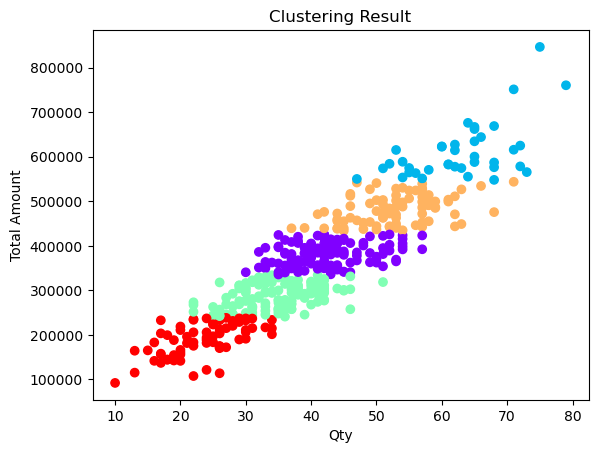

In [42]:
import matplotlib.pyplot as plt

# Scatter plot with cluster coloring
plt.scatter(X['Qty'], X['TotalAmount'], c=X['cluster'], cmap='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Result')
plt.show()


In [43]:
# WCSS (Within-Cluster Sum of Squares) 
wcss= []
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X)
    wcss.append(model1.inertia_)
print(wcss)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

[6928031860506.971, 2434662707314.1494, 1233033389926.2039, 776512017619.5986, 504081360603.5856, 382593519915.83765, 277766901539.5539, 212941532204.22357, 171724378862.4612, 136882282691.96518]


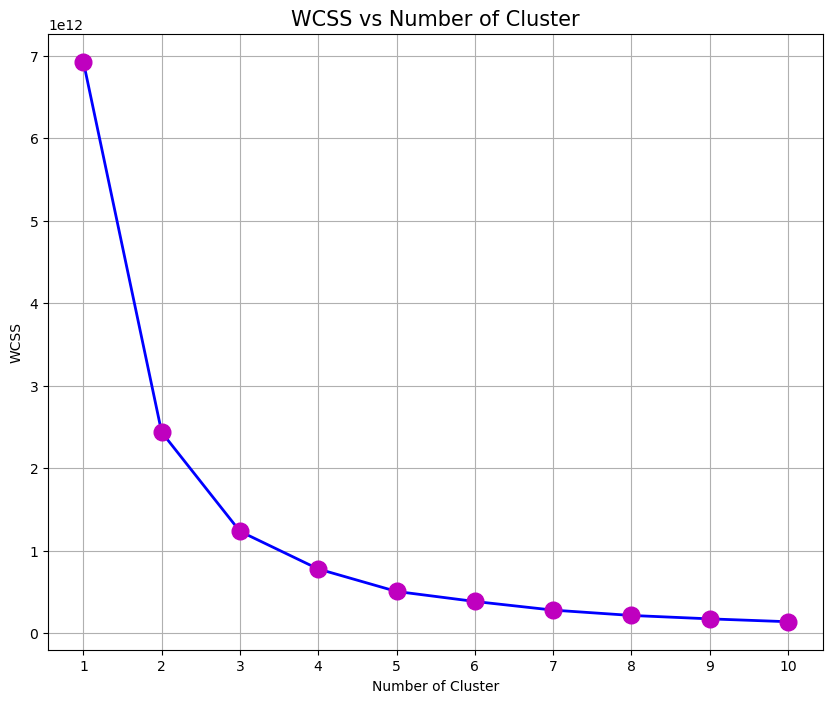

In [44]:
plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm', 
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.grid()
plt.show()

In [45]:
# Membuat Model Clustering dengan K yang optimal
model1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X)
labels1=model1.labels_
centroids1 =model1.cluster_centers_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [46]:
df_cluster = aggregated.drop(columns = ['CustomerID'])
df_cluster.head()

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [47]:
# Masukin cluster ke dataset
df_cluster['cluster'] = model1.labels_
df_cluster.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,2
1,13,57,392300,0
2,15,56,446200,0
3,10,46,302500,3
4,7,27,268600,3


<Figure size 600x600 with 0 Axes>

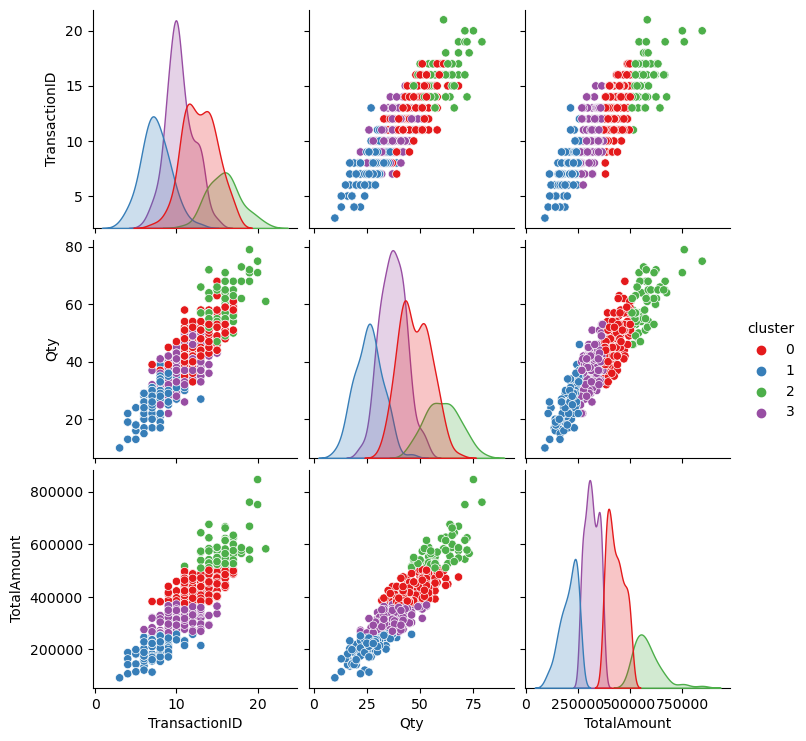

In [48]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [49]:
df_cluster['CustomerID'] = aggregated['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({
    'CustomerID':'count',
    'TransactionID':'mean',
    'Qty':'mean',
    'TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
3,152,10.414474,37.263158,316792.763158
0,140,12.871429,47.521429,431575.000000
1,98,7.448980,25.867347,206380.612245
2,57,15.877193,60.421053,583240.350877


# Kesimpulan

Kluster 1 (Mayoritas Pelanggan):

Memiliki jumlah pelanggan terbanyak.
Menempati posisi ketiga dalam setiap metrik (transaksi, kuantitas, total belanja).
Rekomendasi: Fokus pada hubungan pelanggan dan melakukan survei untuk memahami minat pelanggan.

Kluster 2 (Potensial untuk Pertumbuhan):

Menempati posisi kedua tertinggi dalam setiap metrik.
Rekomendasi: Lakukan promosi rutin untuk meningkatkan transaksi dan dorong penjualan produk dengan harga tinggi.

Kluster 3 (Perlu Perhatian Khusus):

Memiliki nilai terendah dalam setiap metrik.
Rekomendasi: Berikan diskon menarik untuk meningkatkan transaksi, tawarkan promo untuk transaksi besar, dan identifikasi peluang pengembangan produk melalui survei.

Kluster 0 (Jumlah Pelanggan Terendah):

Memiliki jumlah pelanggan paling sedikit, namun nilai tertinggi dalam setiap metrik.
Rekomendasi: Tawarkan program promo loyalitas, lakukan survei kepuasan pelanggan, dan dorong penjualan produk dengan harga lebih tinggi.